<a href="https://colab.research.google.com/github/AndroKun/23423043_Andro-Lintang-Mahaegan_UTS-Pengolahan-Citra-Digital/blob/main/Jawaban_Nomor_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image loaded successfully. Shape: (512, 512), Type: uint8


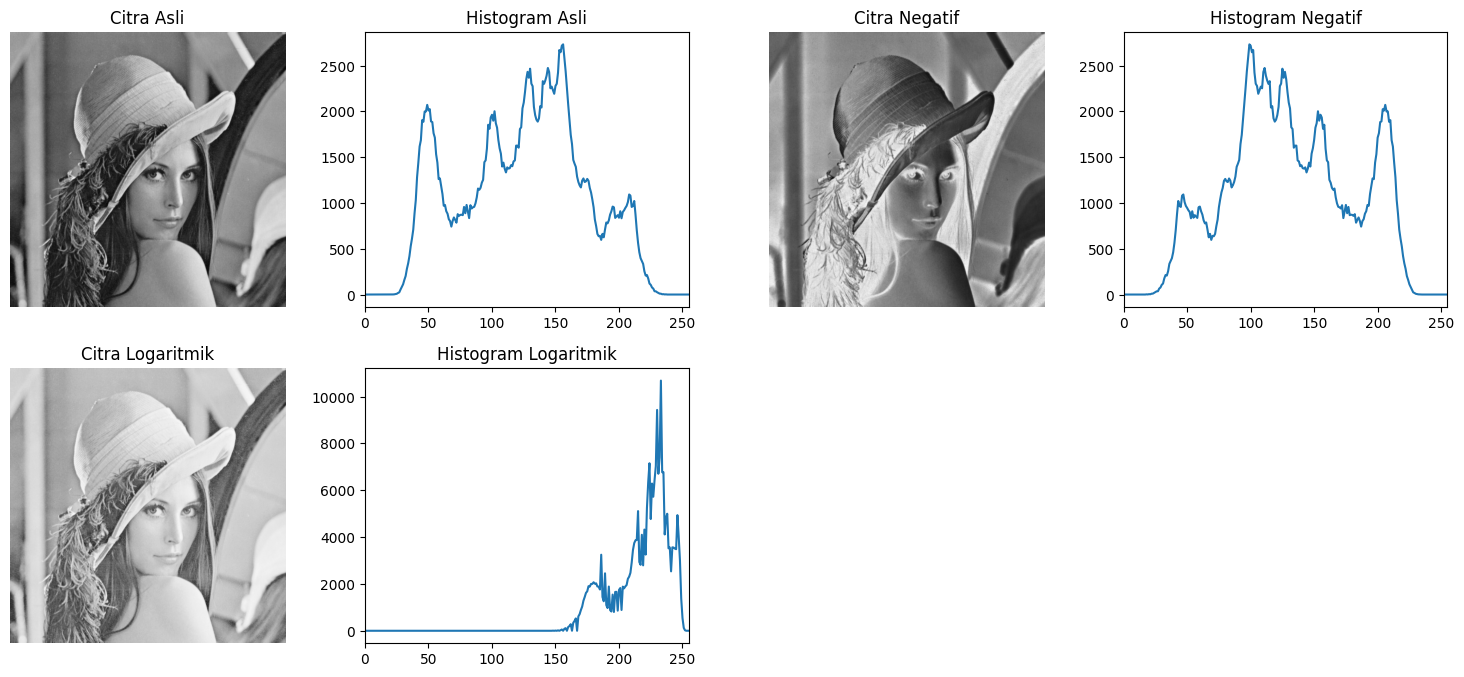


=== STATISTIK GAMBAR ===
Original - Min: 18, Max: 248, Mean: 124.20
Negatif  - Min: 7, Max: 237, Mean: 130.80
Logaritm - Min: 136, Max: 255, Mean: 218.50


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import urllib.request
import os

# Langkah 1: Baca citra grayscale (dengan handling error)
try:
    # Opsi 1: Jika sudah upload file ke Colab
    if os.path.exists('citra_grayscale.jpg'):
        img = cv2.imread('citra_grayscale.jpg', 0)
    elif os.path.exists('sample_image.jpg'):
        img = cv2.imread('sample_image.jpg', 0)
    else:
        # Opsi 2: Download sample image dari internet
        print("Downloading sample image...")
        urllib.request.urlretrieve(
            'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg',
            'sample_image.jpg'
        )
        img = cv2.imread('sample_image.jpg', 0)

    # Cek apakah gambar berhasil dibaca
    if img is None:
        # Opsi 3: Buat gambar synthetic jika semua gagal
        print("Creating synthetic image...")
        img = np.random.randint(0, 256, (256, 256), dtype=np.uint8)

    print(f"Image loaded successfully. Shape: {img.shape}, Type: {img.dtype}")

except Exception as e:
    print(f"Error: {e}")
    # Buat gambar synthetic sebagai fallback
    img = np.random.randint(0, 256, (256, 256), dtype=np.uint8)

# Langkah 2: Terapkan transformasi
# Negatif
img_negatif = 255 - img

# Logaritmik
c = 255 / np.log(1 + np.max(img))
img_log = c * np.log(1 + img.astype(np.float32))
img_log = img_log.astype(np.uint8)

# Histogram
hist_original = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_negatif = cv2.calcHist([img_negatif], [0], None, [256], [0, 256])
hist_log = cv2.calcHist([img_log], [0], None, [256], [0, 256])

# Tampilkan hasil
plt.figure(figsize=(15, 10))

# Citra asli
plt.subplot(3, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(3, 4, 2)
plt.plot(hist_original)
plt.title('Histogram Asli')
plt.xlim([0, 255])

# Citra negatif
plt.subplot(3, 4, 3)
plt.imshow(img_negatif, cmap='gray')
plt.title('Citra Negatif')
plt.axis('off')

plt.subplot(3, 4, 4)
plt.plot(hist_negatif)
plt.title('Histogram Negatif')
plt.xlim([0, 255])

# Citra logaritmik
plt.subplot(3, 4, 5)
plt.imshow(img_log, cmap='gray')
plt.title('Citra Logaritmik')
plt.axis('off')

plt.subplot(3, 4, 6)
plt.plot(hist_log)
plt.title('Histogram Logaritmik')
plt.xlim([0, 255])

plt.tight_layout()
plt.show()

# Tampilkan nilai statistik
print("\n=== STATISTIK GAMBAR ===")
print(f"Original - Min: {np.min(img)}, Max: {np.max(img)}, Mean: {np.mean(img):.2f}")
print(f"Negatif  - Min: {np.min(img_negatif)}, Max: {np.max(img_negatif)}, Mean: {np.mean(img_negatif):.2f}")
print(f"Logaritm - Min: {np.min(img_log)}, Max: {np.max(img_log)}, Mean: {np.mean(img_log):.2f}")